## Observations and Insights 

In [193]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merged
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [176]:
# Checking the number of mice.
unique_mouse = len(merged['Mouse ID'].unique())
unique_mouse

249

In [177]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dfObj = pd.DataFrame(merged, columns=['Mouse ID', 'Timepoint'])
duplicateRowsDF = dfObj[dfObj.duplicated()]
duplicateRowsDF

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [178]:
# Optional: Get all the data for the duplicate mouse ID. 
adfObj = pd.DataFrame(merged, columns=['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites'])
aduplicateRowsDF = adfObj[adfObj.duplicated()]
aduplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [179]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged = merged.drop_duplicates(subset=['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites'])
clean_merged


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [180]:
# Checking the number of mice in the clean DataFrame.
len(clean_merged['Mouse ID'].unique())


249

## Summary Statistics

In [181]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
gb_clean_merged = clean_merged.groupby('Drug Regimen')
mean_gb = gb_clean_merged['Tumor Volume (mm3)'].mean()
#mean_gb
med_gb = gb_clean_merged['Tumor Volume (mm3)'].median()
#med_gb
var_gb = gb_clean_merged['Tumor Volume (mm3)'].var()
#var_gb
sem_gb =gb_clean_merged['Tumor Volume (mm3)'].sem()
#sem_gb
# This method produces everything in a single groupby function
Stats_gb = pd.DataFrame({'Mean': mean_gb, 'Median': med_gb, 'Variance': var_gb, 'SEM': sem_gb})
Stats_gb

,Mean,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.368318,50.909965,42.278090,0.514041
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


In [182]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_merged.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


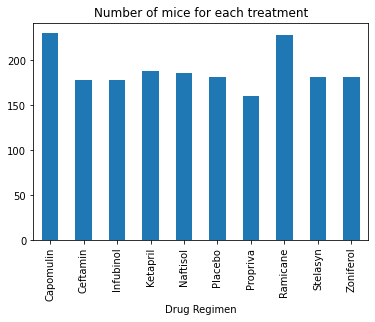

In [183]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Drug_groups = clean_merged.groupby('Drug Regimen')
mouse_count = Drug_groups['Mouse ID'].count()
drug_chart = mouse_count.plot(kind="bar", title="Number of mice for each treatment")
plt.show()

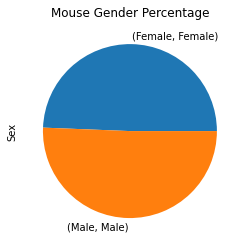

In [184]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mouse = clean_merged.groupby('Sex')
gender_count = gender_mouse['Sex'].value_counts() 
gender_chart = gender_count.plot(kind='pie',y='Mouse ID', title='Mouse Gender Percentage')

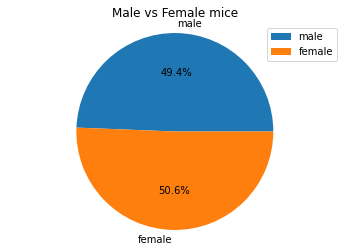

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = gender_count

fig1, ax1 = plt.subplots()
plt.title("Male vs Female mice")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [186]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_volume = clean_merged.sort_values(by='Timepoint', ascending=False)
#final_volume
final_volume = final_volume.drop_duplicates(subset='Mouse ID')
final_volume = final_volume.loc[(final_volume['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]))]
# Start by getting the last (greatest) timepoint for each mouse
final_volume
#final_volume['Drug Regimen'].unique()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
834,f345,Infubinol,Male,23,26,45,60.918767,1
993,j296,Ceftamin,Female,24,30,45,61.849023,3
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
350,v923,Capomulin,Female,19,21,45,40.658124,2
...,...,...,...,...,...,...,...,...
940,h531,Ceftamin,Male,5,27,5,47.784682,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [187]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_volume['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x, treatment in enumerate(treatments):
    sorted_df = final_volume.loc[(final_volume["Drug Regimen"]== treatment)]
    tumor_vol.append(sorted_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']])
    #quartiles = sorted_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = sorted_df['Tumor Volume (mm3)'].quantile(.25)
    upperq = sorted_df['Tumor Volume (mm3)'].quantile(.75)
    iqr = upperq - lowerq
    #print(f"The lower quartile of occupancy is: {lowerq}")
    #print(f"The upper quartile of occupancy is: {upperq}")
    #print(f"The interquartile range of occupancy is: {iqr}")
    #print(f"The the median of occupancy is: {quartiles[0.5]} ")

    lower_bound = round(lowerq - (1.5*iqr),4)
    upper_bound = round(upperq + (1.5*iqr),4)
    print(f"Values below {lower_bound} and above {upper_bound} would be considered outliers")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Values below 36.8329 and above 82.7414 would be considered outliers
Values below 25.3554 and above 87.6665 would be considered outliers
Values below 20.7046 and above 51.832 would be considered outliers
Values below 17.9127 and above 54.3068 would be considered outliers


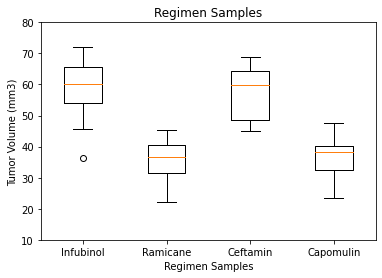

In [188]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimen_values = pd.DataFrame(tumor_vol[0])
regimen_values = regimen_values.append(pd.DataFrame(tumor_vol[1]))
regimen_values = regimen_values.append(pd.DataFrame(tumor_vol[2]))
regimen_values = regimen_values.append(pd.DataFrame(tumor_vol[3]))
#Seperate drugs by regimen into series 
drug_vs_tvol = regimen_values.reset_index() 
drug_vs_tvol = regimen_values[["Drug Regimen","Tumor Volume (mm3)"]]
#Inf
inf_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Infubinol"]
inf_drug = inf_drug.reset_index()
inf_drug_series = inf_drug["Tumor Volume (mm3)"]
inf_drug_series = pd.Series(inf_drug_series)
#Ceft
ceft_drug = drug_vs_tvol.loc[drug_vs_tvol['Drug Regimen'] == "Ceftamin"]
ceft_drug = ceft_drug.reset_index()
ceft_drug_series = ceft_drug['Tumor Volume (mm3)']
ceft_drug_series = pd.Series(ceft_drug_series)
#Capo
capo_drug = drug_vs_tvol.loc[drug_vs_tvol['Drug Regimen'] == "Capomulin"]
capo_drug = capo_drug.reset_index()
capo_drug_series = capo_drug['Tumor Volume (mm3)']
capo_drug_series = pd.Series(capo_drug_series)
#Rami
rami_drug = drug_vs_tvol.loc[drug_vs_tvol['Drug Regimen'] == "Ramicane"]
rami_drug = rami_drug.reset_index()
rami_drug_series = rami_drug['Tumor Volume (mm3)']
rami_drug_series = pd.Series(rami_drug_series)
#plt everything
data = [inf_drug_series,rami_drug_series,ceft_drug_series,capo_drug_series]
fig7, ax7 = plt.subplots()
ax7.set_title('Regimen Samples')
plt.xlabel("Regimen Samples")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(10,80)
ax7.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Infubinol', 'Ramicane', 'Ceftamin','Capomulin'])
plt.show()

## Line and Scatter Plots

No handles with labels found to put in legend.


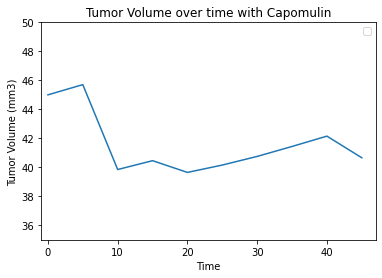

In [189]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#capmice = clean_merged.loc[clean_merged['Drug Regimen']== "Capomulin"]
capmouse = clean_merged.loc[clean_merged['Mouse ID']== "v923"] 
capmice = capmouse.loc[clean_merged['Drug Regimen']== "Capomulin"]
plt.title("Tumor Volume over time with Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(35,50)
plt.xlim(-1,47)
plt.plot(capmouse["Timepoint"], capmice["Tumor Volume (mm3)"] )
plt.legend()
plt.show()

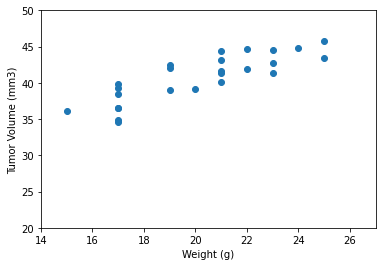

In [195]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_cap = clean_merged.loc[clean_merged['Drug Regimen']== "Capomulin"]
mice_cap = mice_cap.groupby('Mouse ID').mean()


x_axis = mice_cap['Weight (g)']
y_axis = mice_cap['Tumor Volume (mm3)']
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(20,50)
plt.xlim(14,27)


plt.scatter(x_axis, y_axis, label="Avg Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

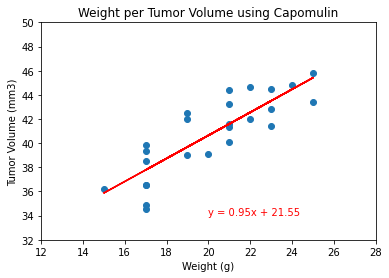

In [196]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_axis, y_axis)
rounded_corr = round(correlation[0],4)
rounded_corr
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Weight per Tumor Volume using Capomulin")

plt.annotate(line_eq,(20,34),fontsize=10,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylim(32,50)
plt.xlim(12,28)
plt.show()